Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


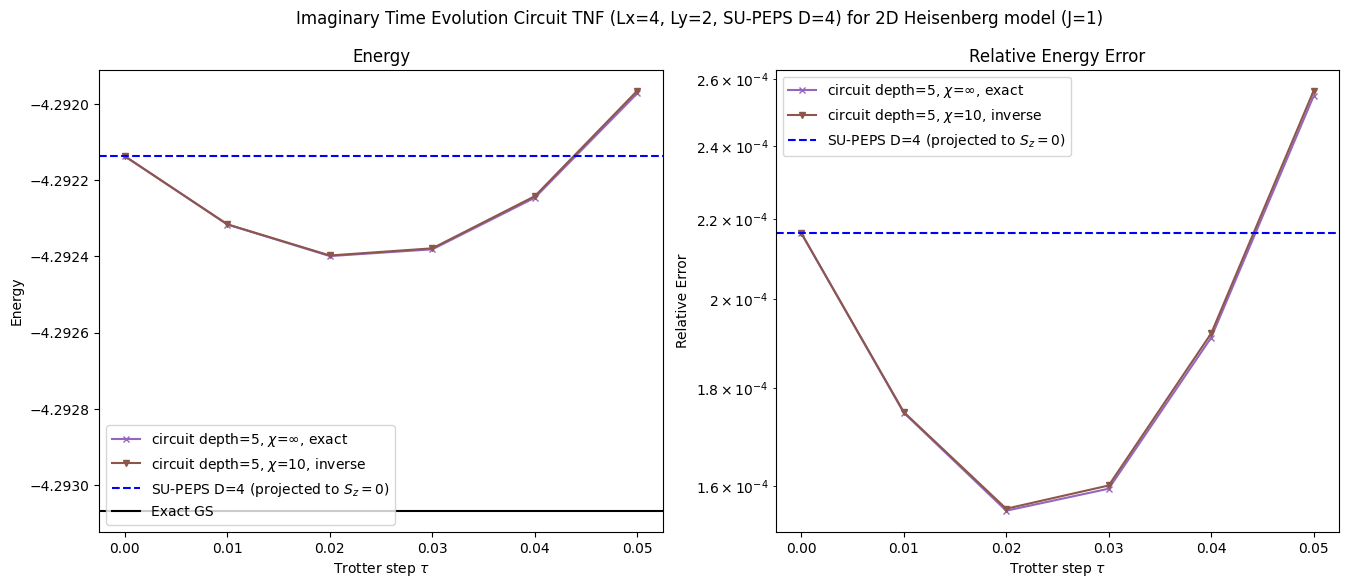

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 5
    chis = [-1, 2, 4, 6, 8, 10]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.292137518079109
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle=':', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend()

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend()
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -3.973448970418529
SU-PEPS D=2 energy: -4.037483743834537


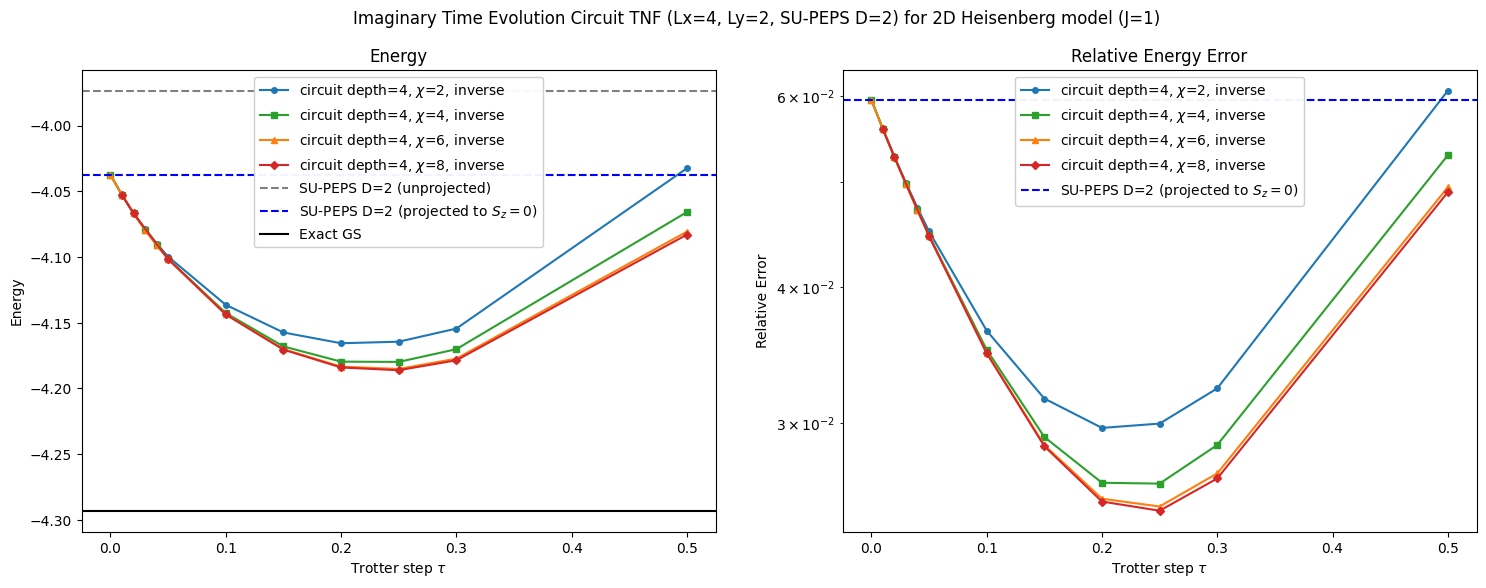

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 2
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 4
    chis = [-1, 2, 4, 6, 8]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


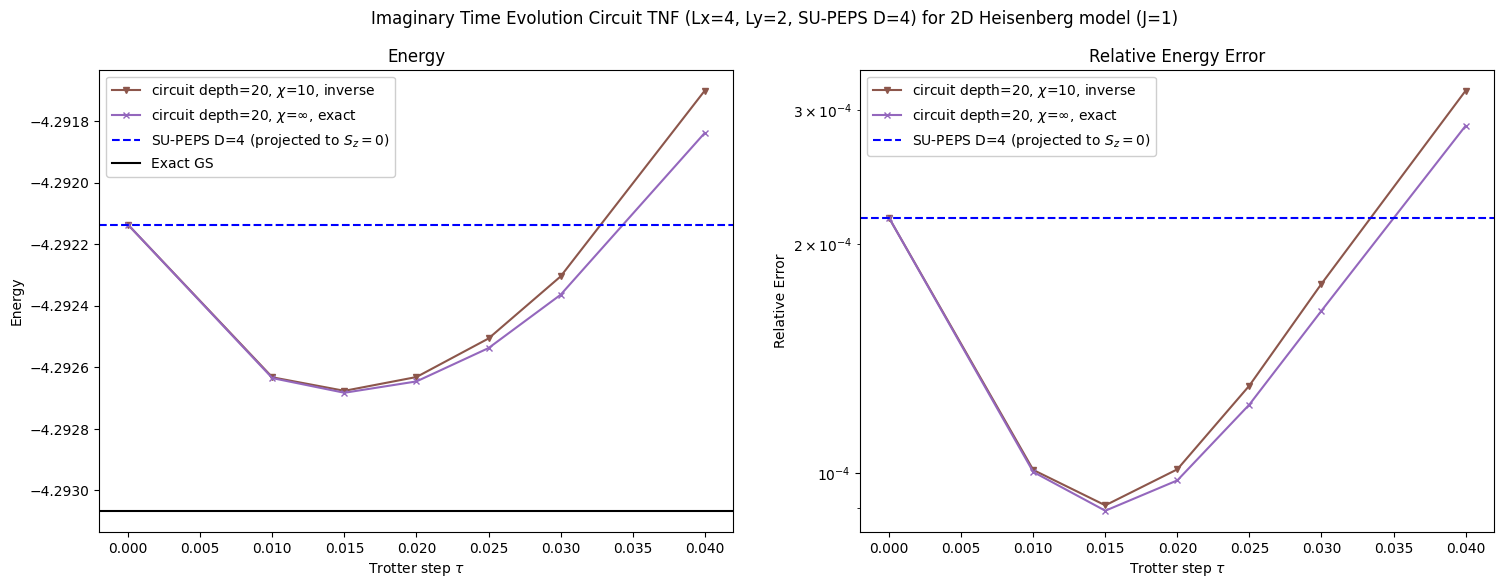

In [56]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 20
    chis = [2, 4, 6, 8, 10, -1]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


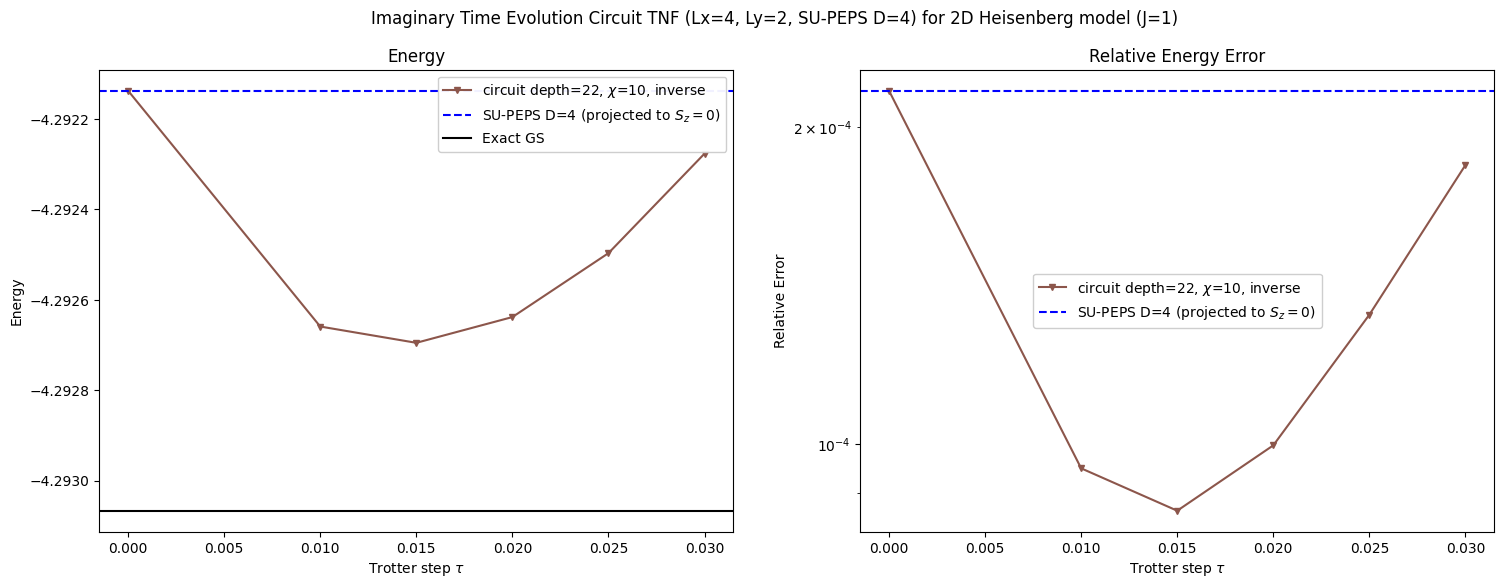

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 22
    chis = [2, 4, 6, 8, 10, -1]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


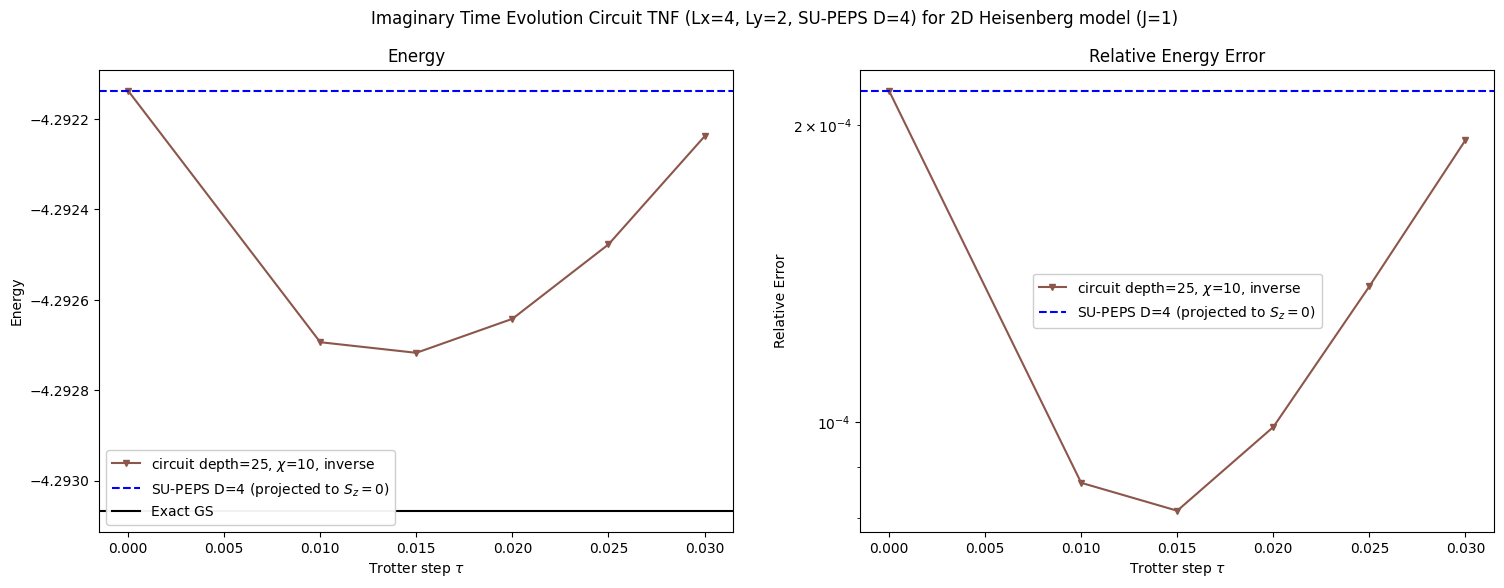

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 2
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 25
    chis = [2, 4, 6, 8, 10, -1]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()


Exact ground state energy: -4.293066456657067
Unprojected SU state energy: -4.238256202064062
SU-PEPS D=4 energy: -4.292137518079109


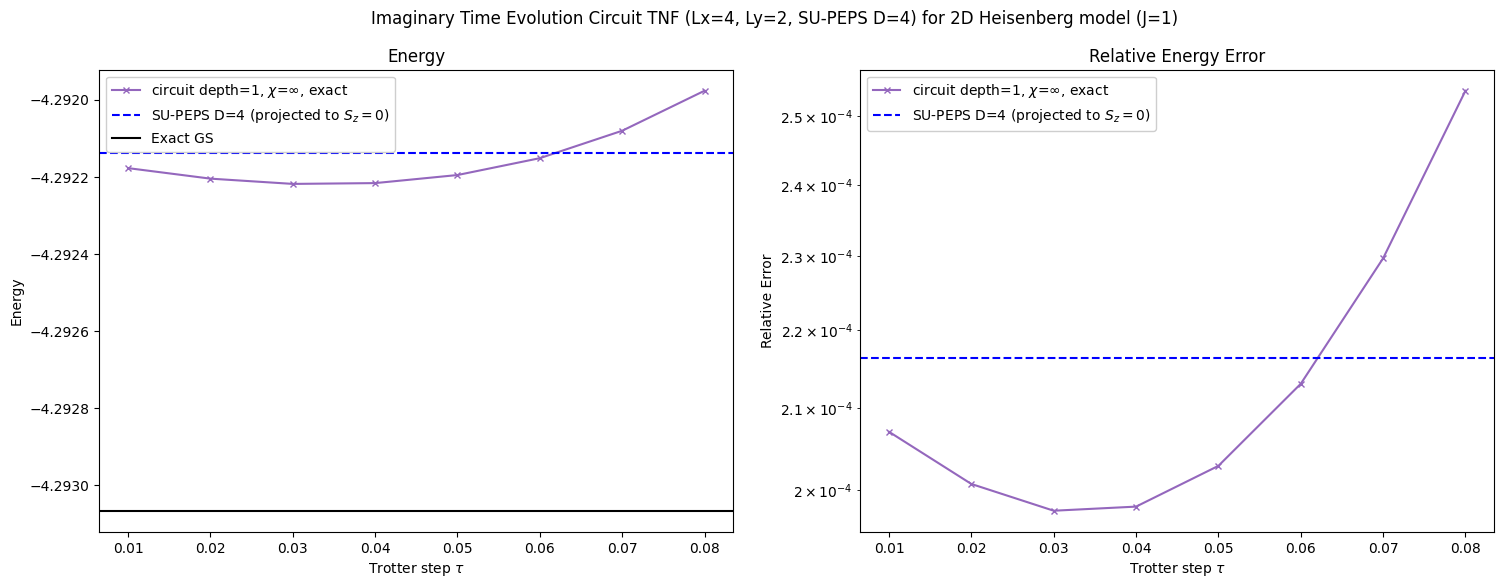

Exact ground state energy: -9.189207065192965
Unprojected SU state energy: 0.0


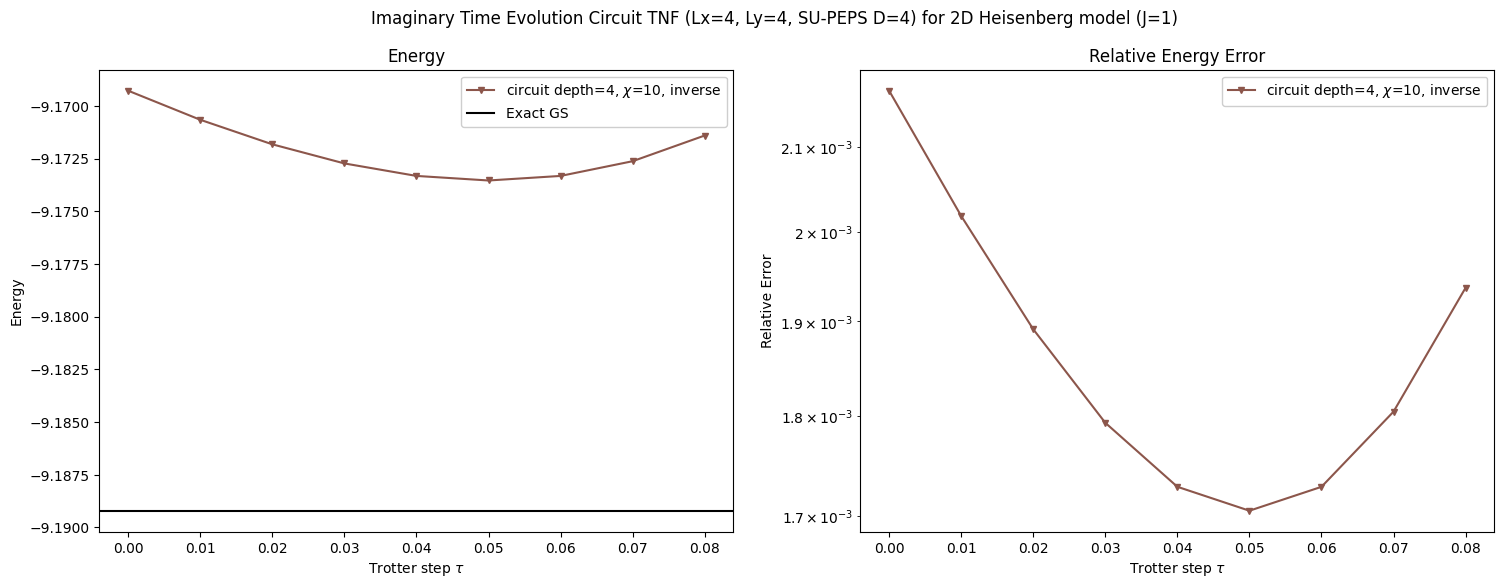

[0.00216835 0.00201832 0.0018916  0.00179296 0.00172847 0.00170494
 0.00172842 0.00180443 0.00193703]


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import json

Lx = 4
Ly = 4
D = 4
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for from_which in ['zmax']:
    # from_which = 'xmax'
    direction = 'spatial' if from_which[0]=='y' else 'inverse'
    # read json data
    data = json.load(open(f"./data/circuitTNF2d_heis_Lx{Lx}_Ly{Ly}_D{D}_exact_sampling_results_{from_which}.json", 'r'))

    data_dict = {}

    for name, Es in data.items():
        parts = name.split('_')
        depth = int(parts[3].split('=')[1])
        tau = float(parts[4].split('=')[1])
        max_bond = int(parts[5].split('=')[1])
        data_dict[(depth, tau, max_bond)] = Es

    depth = 4
    chis = [10, -1]
    chi_symbol = {2: 'o', 4: 's', 6: '^', 8: 'D', -1: 'x', 10: 'v', 64: 'P'}
    chi_colors = {2: 'tab:blue', 4: 'tab:green', 6: 'tab:orange', 8: 'tab:red', -1: 'tab:purple', 10: 'tab:brown', 64: 'tab:cyan'}
    direction_linestyles = {'spatial': '--', 'inverse': '-'}
    chi_tau_Es = {chi: [] for chi in chis}
    exact_E = data_dict.values().__iter__().__next__()[2]
    print(f'Exact ground state energy: {exact_E}')
    SU_E_raw = data_dict.values().__iter__().__next__()[1]
    print(f'Unprojected SU state energy: {SU_E_raw}')
    for depth_tau_chi, Es in data_dict.items():
        d, tau, chi = depth_tau_chi
        if d == depth and chi in chis:
            chi_tau_Es[chi].append([tau, Es[0]])  # (tau, variational energy)
            # if tau==0.0:
            #     SU_E = Es[0]
            #     print(f'Projected SU state energy: {SU_E}')

    for chi, values in chi_tau_Es.items():
        chi_tau_Es[chi] = np.array(values).transpose()


    for chi, plot_data in chi_tau_Es.items():
        try:
            taus, Es = plot_data
            # sort by taus
            sorted_indices = np.argsort(taus)
            taus = taus[sorted_indices]
            Es = Es[sorted_indices]
            chi_legend = chi if chi != -1 else r'$\infty$'
            direction_legend = direction if chi != -1 else 'exact'
            ax[0].plot(taus, Es, label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])

            # rel err
            rel_errs = np.abs((Es - exact_E) / exact_E)
            ax[1].plot(taus, rel_errs,  label=rf'circuit depth={depth}, $\chi$={chi_legend}, {direction_legend}', marker=chi_symbol[chi], markersize=4, linestyle=direction_linestyles[direction], color=chi_colors[chi])
            
        except ValueError:
            continue

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')

# SU_E = -4.037483743834537 if D==2 else -4.292137518079109 if D==4 else None
# print(f'SU-PEPS D={D} energy: {SU_E}')
# # ax[0].axhline(y=SU_E_raw, color='gray', linestyle='--', label=rf'SU-PEPS D={D} (unprojected)')
# ax[0].axhline(y=SU_E, color='b', linestyle='--', label=rf'SU-PEPS D={D} (projected to $S_z=0$)')
ax[0].axhline(y=exact_E, color='black', linestyle='-', label='Exact GS')
ax[0].set_xlabel(r'Trotter step $\tau$')
ax[0].set_ylabel('Energy')
ax[0].set_title('Energy')
ax[0].legend(framealpha=0.95)

# ax[1].axhline(y=abs((SU_E - exact_E)/exact_E), color='b', linestyle='--', label=f'SU-PEPS D={D} (projected to $S_z=0$)')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Trotter step $\tau$')
ax[1].set_ylabel('Relative Error') 
ax[1].set_title('Relative Energy Error')
ax[1].legend(framealpha=0.95)
plt.suptitle(rf'Imaginary Time Evolution Circuit TNF (Lx={Lx}, Ly={Ly}, SU-PEPS D={D}) for 2D Heisenberg model (J=1)')
plt.show()
print(rel_errs)